Aim:
format the data and merge them in one table

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import re
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def to_df(source):
    df = pd.DataFrame()
    for i in source:
        df = df.append(pd.read_csv(i), sort= True)
    return df

In [3]:
v = pd.read_csv('VkerDB.csv', usecols=['date']).max()[0]
print('Latest date in the datebase: {}'.format(v))

Latest date in the datebase: 2020-02-23


In [4]:
#choose the file to import to df
h = sorted([i for i in os.listdir() if 'Hu_Vker' in i])
co = sorted([i for i in os.listdir() if 'Com_Vker' in i])
ce = sorted([i for i in os.listdir() if 'Cen_Vker' in i])
print('Hu:', h)
print('Com:', co)
print('Cen', ce)

Hu: ['Hu_Vker2020-03-03.csv']
Com: ['Com_Vker2020-03-03.csv']
Cen ['Cen_Vker2020-03-03.csv']


In [5]:
for i in h:
    print(re.findall('\d{4}.\d{1,2}.\d{1,2}',i)[0])

2020-03-03


In [6]:
#select the files to load
Hun = to_df(h[-1:])
Com = to_df(co[-1:])
Cen = to_df(ce[-1:])
print('Shape of Hun',Hun.shape)
print('Shape of Com',Com.shape)
print('Shape of Cen',Cen.shape)

Shape of Hun (20, 9)
Shape of Com (46, 11)
Shape of Cen (2, 10)


#### clean up the source data

In [7]:
Hun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
agency         14 non-null object
date           20 non-null object
description    20 non-null object
id             20 non-null int64
price          20 non-null int64
room           20 non-null int64
source         20 non-null object
sqm            20 non-null int64
url            20 non-null object
dtypes: int64(4), object(5)
memory usage: 1.5+ KB


In [8]:
Hun.isnull().sum()

agency         6
date           0
description    0
id             0
price          0
room           0
source         0
sqm            0
url            0
dtype: int64

In [9]:
Hun.loc[Hun['sqm'].isnull()]

,agency,date,description,id,price,room,source,sqm,url


In [10]:
#delete the extra rows
Hun.drop(Hun.loc[Hun['sqm'].isnull()].index, axis = 0, inplace= True)
Hun.shape

(20, 9)

In [11]:
#create 'price_sqm' column
Hun['price_sqm'] = Hun['price'] / Hun['sqm']
Hun['price_sqm'] = Hun['price_sqm'].astype(int)
Hun['price'] = Hun['price'] / 1000000.0

In [12]:
Hun['date'].value_counts()

2020-03-01    20
Name: date, dtype: int64

In [13]:
Com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
agency         7 non-null object
date           46 non-null object
description    0 non-null float64
id             46 non-null int64
price          46 non-null float64
price_sqm      46 non-null int64
region         46 non-null object
room           46 non-null int64
source         46 non-null object
sqm            46 non-null int64
url            46 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 4.1+ KB


In [14]:
Com.isnull().sum()

agency         39
date            0
description    46
id              0
price           0
price_sqm       0
region          0
room            0
source          0
sqm             0
url             0
dtype: int64

In [15]:
Com.head(3)

,agency,date,description,id,price,price_sqm,region,room,source,sqm,url
0,NaN,2020-03-01,NaN,31076698,24.89,957308,"Kálmán Imre utca, V. kerület",1,com,26,https://ingatlan.com/v-ker/elado+lakas/tegla-e...
1,NaN,2020-03-01,NaN,30787567,24.90,957692,"Lipótváros, V. kerület",1,com,26,https://ingatlan.com/v-ker/elado+lakas/tegla-e...
2,NaN,2020-03-01,NaN,31155946,24.90,957692,"Kálmán Imre utca, V. kerület",1,com,26,https://ingatlan.com/v-ker/elado+lakas/tegla-e...


In [16]:
Cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
agency         0 non-null float64
date           2 non-null object
description    2 non-null object
id             2 non-null int64
price          2 non-null float64
region         2 non-null object
room           2 non-null int64
source         2 non-null object
sqm            2 non-null int64
url            2 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 288.0+ bytes


In [17]:
Cen.isnull().sum()

agency         2
date           0
description    0
id             0
price          0
region         0
room           0
source         0
sqm            0
url            0
dtype: int64

In [18]:
Cen['price_sqm'] = Cen['price']*1000000 / Cen['sqm']
Cen['price_sqm'] = Cen['price_sqm'].astype(int)

In [19]:
Cen.head(3)

,agency,date,description,id,price,region,room,source,sqm,url,price_sqm
0,NaN,2020-03-01,"Eladó egy 2. emeleti, utcai nézetű 1 szobás, g...",13247999,36.5,H391787,1,centrum,32,https://www.oc.hu/ingatlanok/H391787?c=1b06e8e0,1140625
1,NaN,2020-03-01,Kis lakás panorámával\nA Parlament és az Olimp...,14123464,75.0,H397307,1,centrum,33,https://www.oc.hu/ingatlanok/H397307?c=1b06e8e0,2272727


#### create one DB

In [20]:
VkerDB = pd.concat([Hun,Com,Cen], axis = 0, sort = True, ignore_index = True)
VkerDB.shape

(68, 11)

In [21]:
# cleaning-up 'room'
VkerDB['room'].value_counts()

1    63
2     4
3     1
Name: room, dtype: int64

In [22]:
VkerDB.duplicated().sum()

0

In [23]:
VkerDB.loc[VkerDB['room'] == '1 + 1 félszoba', 'room'] = 1.5
VkerDB['room'] = VkerDB['room'].astype(float)
VkerDB.loc[VkerDB['room'] == 0.0, 'room'] = 1.0

/home/trismegistos/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [24]:
VkerDB['room'].value_counts()

1.0    133
2.0      8
Name: room, dtype: int64

In [69]:
#Type is not informative, delete from data extraction
#VkerDB.drop(['type'], axis = 1, inplace= True)

In [23]:
#cleaning-up agency
VkerDB['agency'].value_counts()

Saját hirdetés                              7
CDC Ingatlan IV.Ker. Szita Ingatlan Kft.    3
CDC Báthory                                 2
GDN Ingatlaniroda.                          2
Starting Ingatlan iroda                     1
OTP Ingatlanpont Szépvölgyi út              1
AL-MA Digital Kft                           1
Gold House Ingatlaniroda                    1
Homexpress Ingatlaniroda                    1
CDC Bokréta                                 1
Cdci Teréz krt-i iroda                      1
Name: agency, dtype: int64

In [24]:
VkerDB.isnull().sum()

agency         47
date            0
description    46
id              0
price           0
price_sqm       0
region         20
room            0
source          0
sqm             0
url             0
dtype: int64

In [25]:
# reorganise columns
VkerDB = VkerDB[['id', 'date', 'price', 'price_sqm', 'room', 'sqm','region','description','agency', 'source','url']]

In [26]:
Dbfull = pd.read_csv('VkerDB.csv')
print('No of before ads: ',Dbfull.shape)
alls = pd.concat([Dbfull,VkerDB], axis = 0, ignore_index= True)
print('No of ads after: {}'.format(alls.shape))

No of before ads:  (4019, 11)
No of ads after: (4087, 11)


In [27]:
#archive data
#alls.to_csv('VkerDB.csv', index=False, index_label=None)

In [28]:
counts = sorted(zip(alls['date'].value_counts().index,alls['date'].value_counts()))

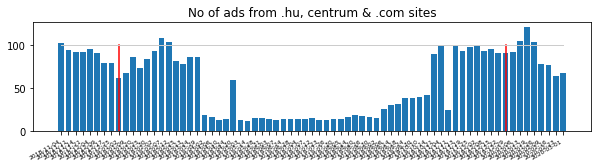

In [29]:
fig = plt.figure(figsize=(10,2))
plt.bar([i[0] for i in counts],[i[1] for i in counts])
plt.plot((counts[8][0], counts[8][0]),(0,100), c= 'r')
plt.plot((counts[62][0], counts[62][0]),(0,100), c= 'r')
plt.plot([counts[0][0],counts[-1][0]],[100,100], c='#cccccc', linewidth = 1)
plt.title('No of ads from .hu, centrum & .com sites')
plt.xticks(rotation=30, ha = 'right', fontsize = '6')
plt.show()

In [30]:
for n,i in enumerate(counts):
    if i[0].find('2020') == 0:
        print(n, i[0])
        #break

63 2020-01-06
64 2020-01-13
65 2020-01-19
66 2020-01-26
67 2020-02-09
68 2020-02-16
69 2020-02-23
70 2020-03-01
